In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Data processing, modeling, and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt 
import seaborn as sns

# Randomization
import random


# DATA SET A

In [2]:
# load csv data 
dataframeA = pd.read_csv('../5. Dataset Feature Dropping/MeterA_featureSelection.csv')

dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

featuresVector = dataframeA[['Flatness ratio','Symmetry','Crossflow','Average speed of sound','Average Gain']]

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

In [3]:
dataframeA['Class Attruibute'].value_counts()
featuresVector.shape

(83, 5)

**Get scaled data for dataset A** 

In [4]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(featuresVector) 

print("------------------------------  scaled data for A -----------------------------")
print(scaled_data)


------------------------------  scaled data for A -----------------------------
[[ 9.61066975e-01 -5.51762461e-01 -1.82472234e+00  8.20842688e-01
   3.31664642e+00]
 [ 1.00279448e+00 -9.44065718e-01 -4.49788945e-01  1.62301423e+00
   2.06783279e+00]
 [ 9.18002910e-01 -2.30339135e-01  3.12573796e-01  1.59759866e+00
   1.29911838e+00]
 [ 9.39969374e-01  6.38158100e-01 -3.48063876e-01 -9.00073528e-02
   7.03297428e-01]
 [ 8.97738692e-01  4.58710041e-01 -6.39313257e-01 -9.06435894e-01
   7.64734199e-01]
 [ 8.16830518e-01  1.79974226e-01 -1.04194064e+00 -9.31314323e-01
   7.34728356e-01]
 [ 9.63591056e-01 -4.25745441e-01 -9.43099823e-01 -4.74750534e-01
   7.63306183e-01]
 [ 9.28727837e-01  2.58338819e-01 -8.02344488e-01 -2.12027886e-01
   6.74719610e-01]
 [ 9.70711819e-01 -6.16911430e-01 -1.62938418e+00 -2.62100353e-01
   7.53304214e-01]
 [ 6.50206825e-01  2.04492052e-01  3.05795431e-02 -6.70456495e-01
   1.87494974e-01]
 [ 7.76002023e-01  9.89829368e-01  5.06549442e-01 -1.00294526e+00
  -3

**Plot graph for cumulative variance witrh 70% threshold** 

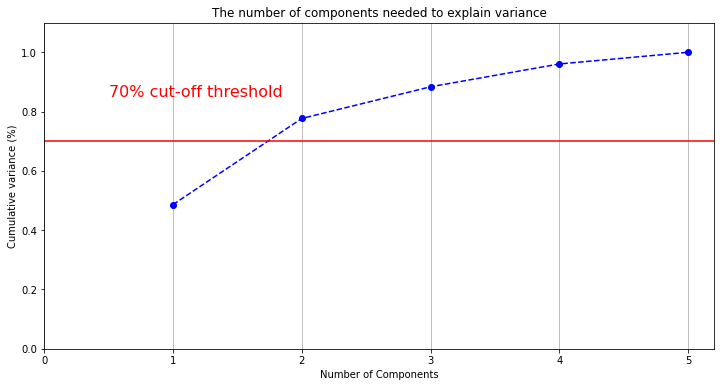

In [5]:
pca = PCA().fit(scaled_data)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 6, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.85, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

The first two principal components will capture 70% of the variance of the original data thus we will select the first two principal components.

**Plot graph for individual and cumulative explained variance** 

---------------PCA - DATA A : EXPLAIN VARIANCE--------------
[2.46154394 1.46937697 0.54091264 0.38973371 0.19940836]
---------------PCA - DATA A : SUM VARIANCE--------------
5.0609756097561025
---------------PCA - DATA A : SIZE OF VARIANCE --------------
5


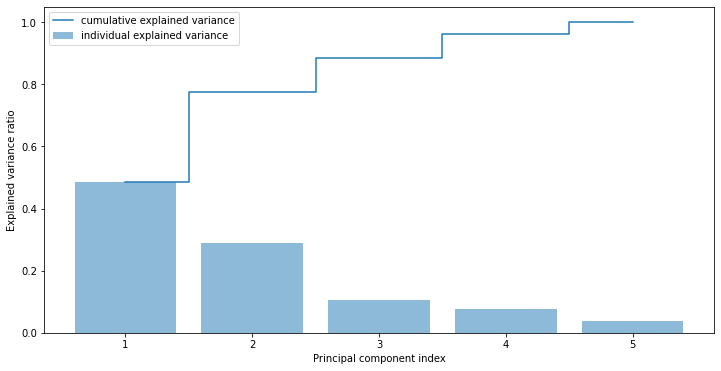

In [6]:
# calculate cumulative sum of explained variances
#from lab 
pca = PCA().fit(scaled_data)

tot = sum(pca.explained_variance_)
print("---------------PCA - DATA A : EXPLAIN VARIANCE--------------")
print(pca.explained_variance_)
print("---------------PCA - DATA A : SUM VARIANCE--------------")
print(tot)
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp))
# plot explained variances
plt.bar(range(1,6), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,6), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

#only the first two components capture almost all the variance in the dataset. 
#So, we decide to select only the first two components

**Plot graph for eignenvalues** 

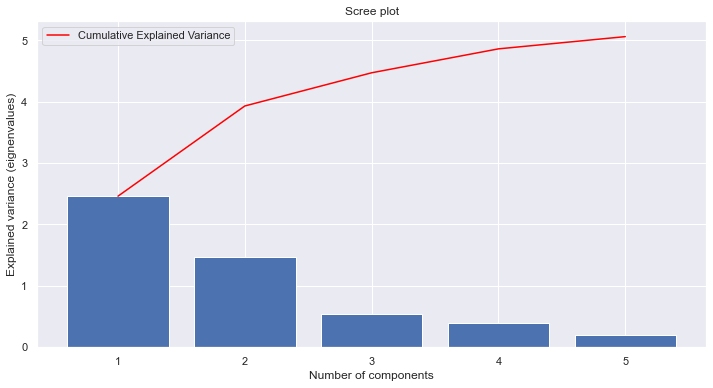

In [7]:
sns.set()
 
pca = PCA(n_components=5)
 
# Fit and transform data
reduced_features = pca.fit_transform(scaled_data)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

**Calculate PCA for n_components = 2**

In [8]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)

pca.explained_variance_ratio_
print(pca.explained_variance_ratio_) # print out explained variance ratio 

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

finalDf_A = pd.concat([pca_df, dataframeA['Class Attruibute']], axis = 1)

finalDf_A
finalDf_A.to_csv('MeterA_pca_2.csv')

Shape before PCA:  (83, 5)
Shape after PCA:  (83, 2)
[0.48637736 0.29033473]


**Calculate PCA for n_components = number of features in original dataset**

In [9]:
pca = PCA(n_components=5)
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)
print('Shape before PCA: ', scaled_data.shape)
print('Shape after PCA: ', pca_features.shape)

pca.explained_variance_ratio_
print(pca.explained_variance_ratio_) # print out explained variance ratio 

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

finalDf_A = pd.concat([pca_df, dataframeA['Class Attruibute']], axis = 1)

finalDf_A
finalDf_A.to_csv('MeterA_pca_all.csv')

Shape before PCA:  (83, 5)
Shape after PCA:  (83, 5)
[0.48637736 0.29033473 0.10687912 0.07700762 0.03940117]


**PCA data reverse back to scaled data**

In [10]:
X_pca_all_back=pca.inverse_transform(pca_features)
print(X_pca_all_back)

[[ 9.61066975e-01 -5.51762461e-01 -1.82472234e+00  8.20842688e-01
   3.31664642e+00]
 [ 1.00279448e+00 -9.44065718e-01 -4.49788945e-01  1.62301423e+00
   2.06783279e+00]
 [ 9.18002910e-01 -2.30339135e-01  3.12573796e-01  1.59759866e+00
   1.29911838e+00]
 [ 9.39969374e-01  6.38158100e-01 -3.48063876e-01 -9.00073528e-02
   7.03297428e-01]
 [ 8.97738692e-01  4.58710041e-01 -6.39313257e-01 -9.06435894e-01
   7.64734199e-01]
 [ 8.16830518e-01  1.79974226e-01 -1.04194064e+00 -9.31314323e-01
   7.34728356e-01]
 [ 9.63591056e-01 -4.25745441e-01 -9.43099823e-01 -4.74750534e-01
   7.63306183e-01]
 [ 9.28727837e-01  2.58338819e-01 -8.02344488e-01 -2.12027886e-01
   6.74719610e-01]
 [ 9.70711819e-01 -6.16911430e-01 -1.62938418e+00 -2.62100353e-01
   7.53304214e-01]
 [ 6.50206825e-01  2.04492052e-01  3.05795431e-02 -6.70456495e-01
   1.87494974e-01]
 [ 7.76002023e-01  9.89829368e-01  5.06549442e-01 -1.00294526e+00
  -3.09743323e-01]
 [ 6.85200695e-01  1.04419491e+00  2.01281563e-01 -8.61358535e-01

**Scaled data reverse back to original data**

In [11]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[8.41498715e-01 1.00936653e+00 9.93816009e-01 1.48539123e+03
  3.50641895e+01]
 [8.42250216e-01 1.00658369e+00 9.96605206e-01 1.48591990e+03
  3.49752808e+01]
 [8.40723143e-01 1.01164657e+00 9.98151739e-01 1.48590315e+03
  3.49205526e+01]
 [8.41118753e-01 1.01780731e+00 9.96811566e-01 1.48479094e+03
  3.48781334e+01]
 [8.40358190e-01 1.01653439e+00 9.96220736e-01 1.48425287e+03
  3.48825074e+01]
 [8.38901056e-01 1.01455715e+00 9.95403964e-01 1.48423648e+03
  3.48803711e+01]
 [8.41544173e-01 1.01026044e+00 9.95604473e-01 1.48453738e+03
  3.48824057e+01]
 [8.40916296e-01 1.01511304e+00 9.95890010e-01 1.48471052e+03
  3.48760989e+01]
 [8.41672416e-01 1.00890439e+00 9.94212273e-01 1.48467752e+03
  3.48816936e+01]
 [8.35900209e-01 1.01473107e+00 9.97579684e-01 1.48440840e+03
  3.48414111e+01]
 [8.38165746e-01 1.02030192e+00 9.98545239e-01 1.48418927e+03
  3.48060105e+01]
 [8.36530439e-01 1.02068757e+00 9.97925971e-01 1.48428258e+03
  3.47762041e+01]
 [8.33182062e-01 1.01601228e+00 9.980966

**Plot graph for PCA data with only PC1 and PC2**

1
2


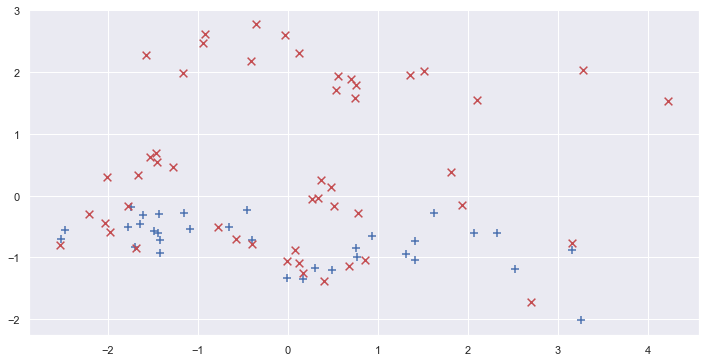

In [12]:
import matplotlib.pyplot as plt

colors = {1:'b', 2:'r'}
markerTypes = {1:'+', 2:'x'}

for foodType in markerTypes:
    print(foodType)
    d = finalDf_A[finalDf_A['Class Attruibute']==foodType]
    plt.scatter(d['PC1'],d['PC2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

# DATA SET B

In [13]:
# for dataset B

# Load and check data

dataframeB = pd.read_csv('../5. Dataset Feature Dropping/MeterB_featureSelection.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

featuresVector_B = dataframeB[['Profile factor','Symmetry','Crossflow','Swirl Angle','Average flow velocity','Average speed of sound','Average Signal Strength','Average Signal Strength','Meter performance','Average Gain','Average Transit Time']]

# yLbl is Class Attruibute labels

yLblForB = dataframeB[['Class Attruibute']]

**Get Scaled data for dataset B**

In [14]:
# fit and transform the data
scaled_data_B = scaler.fit_transform(featuresVector_B) 

print("------------------------------  scaled data for B -----------------------------")
print(scaled_data_B)


------------------------------  scaled data for B -----------------------------
[[-3.72421307e-01 -2.02156225e-01 -2.08302234e-02 -8.42756453e-01
  -1.12176661e+00 -8.66040835e-01  9.88579698e-01  9.88579698e-01
   6.85462141e-01 -9.73855384e-01  5.69942038e-01]
 [-3.18265740e-01 -1.56211266e-01  8.36591671e-03 -7.62648032e-01
  -1.12089957e+00 -8.76966728e-01  9.85513157e-01  9.85513157e-01
   6.85462141e-01 -9.73855384e-01  5.74233863e-01]
 [-3.97460981e-01 -2.02474027e-01  2.41251954e-02 -9.15810550e-01
  -5.28466297e-01 -8.74256304e-01  9.53713195e-01  9.53713195e-01
   6.85462141e-01 -9.73855384e-01  5.73243023e-01]
 [-3.91189863e-01 -1.96799011e-01  2.48993377e-02 -8.82212839e-01
  -5.27196403e-01 -8.67998041e-01  9.50226023e-01  9.50226023e-01
   6.85462141e-01 -9.73855384e-01  5.70798273e-01]
 [-3.95131708e-01 -1.95664006e-01  2.76641263e-02 -9.95560277e-01
  -5.27619701e-01 -8.70495388e-01  9.47003963e-01  9.47003963e-01
   6.85462141e-01 -9.73855384e-01  5.71794856e-01]
 [-4.

**Plot graph for cumulative variance with 70% threshold** 

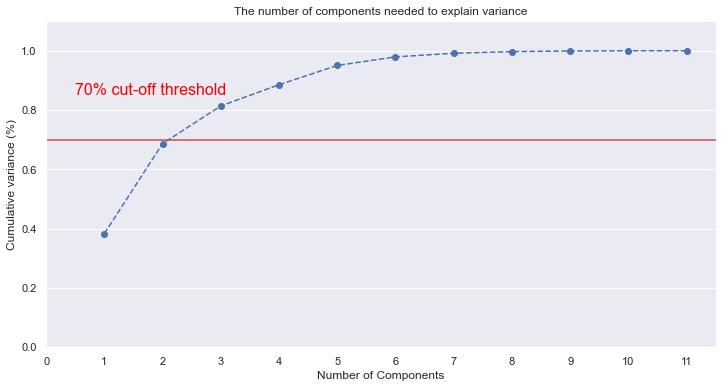

In [15]:
# calculate cumulative sum of explained variances
pcaB = PCA().fit(scaled_data_B)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pcaB.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 12, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.85, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


The first three principal components will capture 70% of the variance of the original data thus we will select the first three principal components.

**Plot graph for individual and cumulative explained variance** 

[3.83275537e-01 3.03549197e-01 1.27134698e-01 7.14253728e-02
 6.49826606e-02 2.89753179e-02 1.21967601e-02 5.60251746e-03
 1.95188863e-03 9.06050388e-04 6.07173090e-35]
---------------PCA - DATA B : EXPLAIN VARIANCE--------------
[4.27895674e+00 3.38887761e+00 1.41935454e+00 7.97405655e-01
 7.25478062e-01 3.23485639e-01 1.36166814e-01 6.25475083e-02
 2.17912342e-02 1.01153088e-02 6.77858912e-34]
---------------PCA - DATA B : SUM VARIANCE--------------
11.164179104477617
---------------PCA - DATA A : SIZE OF VARIANCE --------------
11


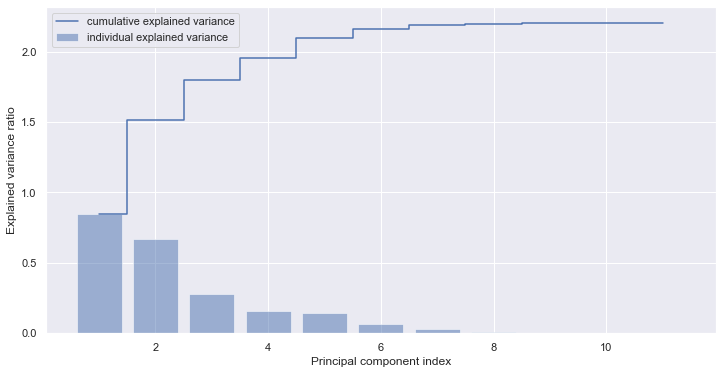

In [16]:
# calculate cumulative sum of explained variances
pcaB = PCA().fit(scaled_data_B)

pcaB.explained_variance_ratio_
print(pcaB.explained_variance_ratio_) # print out explained variance ratio 

total_B = sum(pcaB.explained_variance_)
print("---------------PCA - DATA B : EXPLAIN VARIANCE--------------")
print(pcaB.explained_variance_)
print("---------------PCA - DATA B : SUM VARIANCE--------------")
print(total_B)
var_exp_B = [(i / tot) for i in sorted(pcaB.explained_variance_, reverse=True)]
cum_var_exp_B = np.cumsum(var_exp_B)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp_B))
# plot explained variances
plt.bar(range(1,12), var_exp_B, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,12), cum_var_exp_B, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


**Plot graph for eignenvalues** 

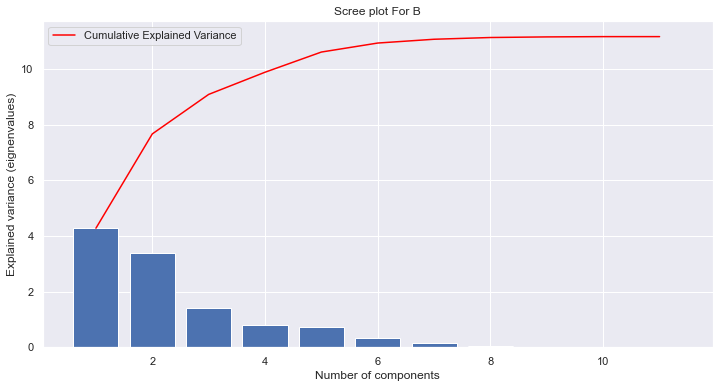

In [17]:
sns.set()
 
pcaB = PCA(n_components=11)
 
# Fit and transform data
reduced_features = pcaB.fit_transform(scaled_data_B)#featuresVector_B)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pcaB.explained_variance_)+1),
    pcaB.explained_variance_
    )
 
plt.plot(
    range(1,len(pcaB.explained_variance_ )+1),
    np.cumsum(pcaB.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot For B')
 
plt.show()

**Calculate PCA for n_components = 3**

In [18]:
pca_B = PCA(n_components=3)

pca_features_B = pca_B.fit_transform(scaled_data_B)
 
print('Shape before PCA: ', scaled_data_B.shape)
print('Shape after PCA: ', pca_features_B.shape)
 
pca_df_B = pd.DataFrame(
    data=pca_features_B, 
    columns=['PC1', 'PC2', 'PC3'])

finalDf_B = pd.concat([pca_df_B, dataframeB['Class Attruibute']], axis = 1)

finalDf_B
finalDf_B.to_csv('MeterB_pca_3.csv')

Shape before PCA:  (68, 11)
Shape after PCA:  (68, 3)


**Calculate PCA for n_components = numebr of original feature**

In [19]:
pca_B = PCA(n_components=11)

pca_features_B = pca_B.fit_transform(scaled_data_B)
 
print('Shape before PCA: ', scaled_data_B.shape)
print('Shape after PCA: ', pca_features_B.shape)
 
pca_df_B = pd.DataFrame(
    data=pca_features_B, 
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9','PC10','PC11'])

finalDf_B = pd.concat([pca_df_B, dataframeB['Class Attruibute']], axis = 1)

finalDf_B
finalDf_B.to_csv('MeterB_pca_all.csv')

Shape before PCA:  (68, 11)
Shape after PCA:  (68, 11)


**PCA data reverse back to scaled data**

In [20]:
X_pca_all_back=pca_B.inverse_transform(pca_features_B)
print(X_pca_all_back)

[[-3.72421307e-01 -2.02156225e-01 -2.08302234e-02 -8.42756453e-01
  -1.12176661e+00 -8.66040835e-01  9.88579698e-01  9.88579698e-01
   6.85462141e-01 -9.73855384e-01  5.69942038e-01]
 [-3.18265740e-01 -1.56211266e-01  8.36591671e-03 -7.62648032e-01
  -1.12089957e+00 -8.76966728e-01  9.85513157e-01  9.85513157e-01
   6.85462141e-01 -9.73855384e-01  5.74233863e-01]
 [-3.97460981e-01 -2.02474027e-01  2.41251954e-02 -9.15810550e-01
  -5.28466297e-01 -8.74256304e-01  9.53713195e-01  9.53713195e-01
   6.85462141e-01 -9.73855384e-01  5.73243023e-01]
 [-3.91189863e-01 -1.96799011e-01  2.48993377e-02 -8.82212839e-01
  -5.27196403e-01 -8.67998041e-01  9.50226023e-01  9.50226023e-01
   6.85462141e-01 -9.73855384e-01  5.70798273e-01]
 [-3.95131708e-01 -1.95664006e-01  2.76641263e-02 -9.95560277e-01
  -5.27619701e-01 -8.70495388e-01  9.47003963e-01  9.47003963e-01
   6.85462141e-01 -9.73855384e-01  5.71794856e-01]
 [-4.29891607e-01 -1.79456144e-01  8.75298790e-03 -1.00213634e+00
  -5.27111743e-01 -

**Scaled data reverse back to PCA data**

In [21]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[ 1.18508889e+00  1.02812778e+00  1.01647778e+00  1.50000000e-01
   2.39443889e+00  1.48515322e+03  4.88300486e+03  4.88300486e+03
   1.00000000e+02  5.14750000e+01  1.02135383e+02]
 [ 1.19180556e+00  1.03375000e+00  1.01941111e+00  2.17000000e-01
   2.39608889e+00  1.48503072e+03  4.88096458e+03  4.88096458e+03
   1.00000000e+02  5.14750000e+01  1.02143804e+02]
 [ 1.18198333e+00  1.02808889e+00  1.02099444e+00  8.89000000e-02
   3.52351667e+00  1.48506111e+03  4.85980694e+03  4.85980694e+03
   1.00000000e+02  5.14750000e+01  1.02141860e+02]
 [ 1.18276111e+00  1.02878333e+00  1.02107222e+00  1.17000000e-01
   3.52593333e+00  1.48513128e+03  4.85748681e+03  4.85748681e+03
   1.00000000e+02  5.14750000e+01  1.02137063e+02]
 [ 1.18227222e+00  1.02892222e+00  1.02135000e+00  2.22000000e-02
   3.52512778e+00  1.48510328e+03  4.85534306e+03  4.85534306e+03
   1.00000000e+02  5.14750000e+01  1.02139019e+02]
 [ 1.17796111e+00  1.03090556e+00  1.01945000e+00  1.67000000e-02
   3.52609444e+00  

**Plot graph for PCA data with only PC1 and PC2**

1
2
3


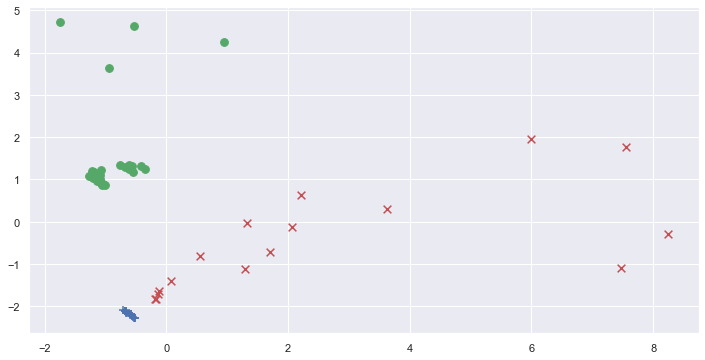

In [22]:
import matplotlib.pyplot as plt

colors = {1:'b', 2:'r', 3:'g'}
markerTypes = {1:'+', 2:'x', 3:'o'}

for foodType in markerTypes:
    print(foodType)
    d = finalDf_B[finalDf_B['Class Attruibute']==foodType]
    plt.scatter(d['PC1'],d['PC2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

# DATA SET C

In [23]:
# for dataset C

# Load and check data

dataframeC = pd.read_csv('../5. Dataset Feature Dropping/MeterC_featureSelection.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

featuresVector_C = dataframeC[['Profile factor','Symmetry','Crossflow','Average Flow Velocity','Average Gain','Average Signal Quality','Average Signal Strength']]

# yLbl is Class Attruibute labels

yLblForC = dataframeC[['Class Attruibute']]

**Get scaled data for dataset C**

In [24]:
# fit and transform the data
scaled_data_C = scaler.fit_transform(featuresVector_C) 

#print(dataframeA)
print("------------------------------  scaled data for C -----------------------------")
print(scaled_data_C)


------------------------------  scaled data for C -----------------------------
[[-0.1160594   0.13532688  0.10434107 ... -0.30825579 -0.68457622
  -0.14067072]
 [-0.11611594  0.12268785  0.13189301 ... -0.30848585 -0.45841123
  -0.14067072]
 [-0.11624464  0.10121556  0.14730422 ... -0.30848585 -0.4271028
  -0.14067072]
 ...
 [-0.11604356 -0.00389841  0.05094653 ... -0.30730269 -0.17184605
  -0.14067072]
 [-0.11568977 -0.03307138  0.12465526 ... -0.30730269 -0.34979444
  -0.14067072]
 [-0.11604855 -0.11379437  0.04165129 ... -0.30789427 -0.36391963
  -0.14067072]]


**Plot graph for cumulative variance with 70% variance threshold**

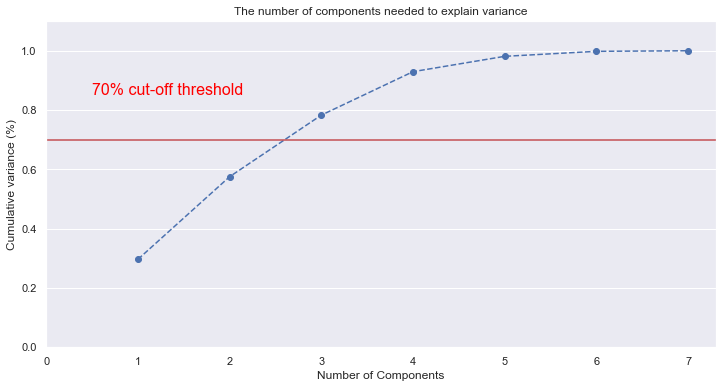

In [25]:
# calculate cumulative sum of explained variances
pcaC = PCA().fit(scaled_data_C)

# matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 8, step=1)
y = np.cumsum(pcaC.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 8, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='r', linestyle='-')
plt.text(0.5, 0.85, '70% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


The first three principal components will capture 70% of the variance of the original data thus we will select the first three principal components.

**Plot graph for individual and cumulative explained variance** 

[0.29622762 0.27883721 0.20775509 0.14659997 0.05175235 0.01683532
 0.00199244]
---------------PCA - DATA C : EXPLAIN VARIANCE--------------
[2.08732574 1.96478672 1.46391665 1.0329958  0.36466554 0.1186277
 0.01403947]
---------------PCA - DATA C : SUM VARIANCE--------------
7.046357615894043
---------------PCA - DATA A : SIZE OF VARIANCE --------------
7


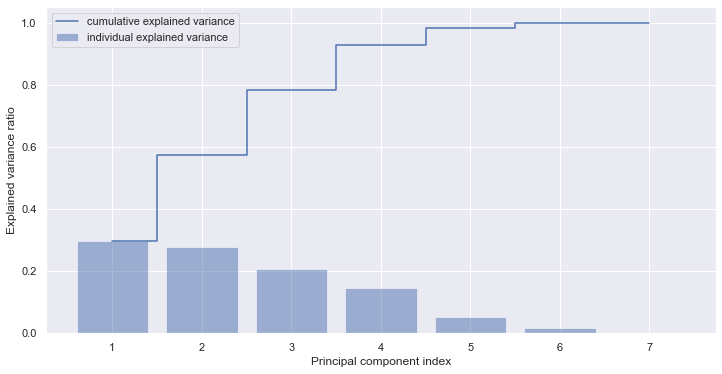

In [26]:
# calculate cumulative sum of explained variances
#from lab

pcaC = PCA().fit(scaled_data_C)

pcaC.explained_variance_ratio_
print(pcaC.explained_variance_ratio_) # print out explained variance ratio 

totalC = sum(pcaC.explained_variance_)
print("---------------PCA - DATA C : EXPLAIN VARIANCE--------------")
print(pcaC.explained_variance_)
print("---------------PCA - DATA C : SUM VARIANCE--------------")
print(totalC)
var_exp_c = [(i / totalC) for i in sorted(pcaC.explained_variance_, reverse=True)]
cum_var_exp_c = np.cumsum(var_exp_c)
print("---------------PCA - DATA A : SIZE OF VARIANCE --------------")
print(len(var_exp_c))
# plot explained variances
plt.bar(range(1,8), var_exp_c, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,8), cum_var_exp_c, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

**Plot graph for eignenvalues** 

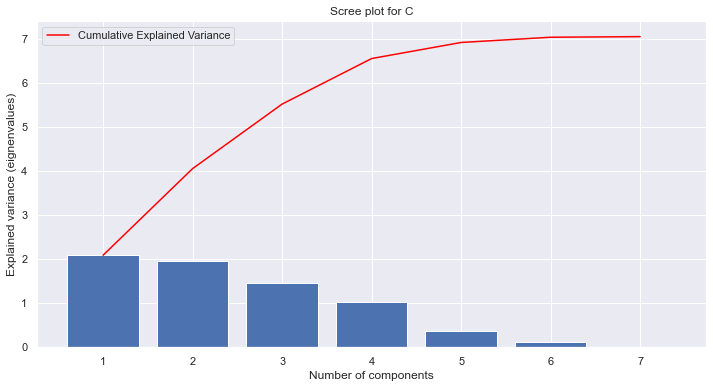

In [27]:
sns.set()

pcaC = PCA(n_components=7)
 
# Fit and transform data
reduced_features = pcaC.fit_transform(scaled_data_C)#featuresVector_B)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pcaC.explained_variance_)+1),
    pcaC.explained_variance_
    )
 
plt.plot(
    range(1,len(pcaC.explained_variance_ )+1),
    np.cumsum(pcaC.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot for C')
 
plt.show()

**Calculate PCA for n_components = 3**

In [28]:
pca_C = PCA(n_components=3)

pca_features_C = pca_C.fit_transform(scaled_data_C)
 
print('Shape before PCA: ', scaled_data_C.shape)
print('Shape after PCA: ', pca_features_C.shape)
 
pca_df_C = pd.DataFrame(
    data=pca_features_C, 
    columns=['PC1', 'PC2', 'PC3'])

finalDf_C = pd.concat([pca_df_C, dataframeC['Class Attruibute']], axis = 1)

finalDf_C.to_csv('MeterC_pca_3.csv')

Shape before PCA:  (152, 7)
Shape after PCA:  (152, 3)


**Calculate PCA for n_components = numebr of original feature**

In [29]:
pca_C = PCA(n_components=7)

pca_features_C = pca_C.fit_transform(scaled_data_C)
 
print('Shape before PCA: ', scaled_data_C.shape)
print('Shape after PCA: ', pca_features_C.shape)
 
pca_df_C = pd.DataFrame(
    data=pca_features_C, 
    columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6','PC7'])

finalDf_C = pd.concat([pca_df_C, dataframeC['Class Attruibute']], axis = 1)

finalDf_C.to_csv('MeterC_pca_all.csv')

Shape before PCA:  (152, 7)
Shape after PCA:  (152, 7)


**PCA data reverse back to scaled data**

In [30]:
X_pca_all_back=pca_C.inverse_transform(pca_features_C)
print(X_pca_all_back)

[[-0.1160594   0.13532688  0.10434107 ... -0.30825579 -0.68457622
  -0.14067072]
 [-0.11611594  0.12268785  0.13189301 ... -0.30848585 -0.45841123
  -0.14067072]
 [-0.11624464  0.10121556  0.14730422 ... -0.30848585 -0.4271028
  -0.14067072]
 ...
 [-0.11604356 -0.00389841  0.05094653 ... -0.30730269 -0.17184605
  -0.14067072]
 [-0.11568977 -0.03307138  0.12465526 ... -0.30730269 -0.34979444
  -0.14067072]
 [-0.11604855 -0.11379437  0.04165129 ... -0.30789427 -0.36391963
  -0.14067072]]


**Scaled Data reverse back to original data**

In [31]:
original_data = scaler.inverse_transform(X_pca_all_back)
print(original_data)

[[1.10268971e+00 1.00442493e+00 1.00674138e+00 ... 1.51097222e+01
  3.15670833e+03 6.17500000e+01]
 [1.10143161e+00 1.00372200e+00 1.00825617e+00 ... 1.51000000e+01
  3.20524306e+03 6.17500000e+01]
 [1.09856774e+00 1.00252780e+00 1.00910347e+00 ... 1.51000000e+01
  3.21196181e+03 6.17500000e+01]
 ...
 [1.10304205e+00 9.96681790e-01 1.00380577e+00 ... 1.51500000e+01
  3.26673958e+03 6.17500000e+01]
 [1.11091467e+00 9.95059309e-01 1.00785824e+00 ... 1.51500000e+01
  3.22855208e+03 6.17500000e+01]
 [1.10293110e+00 9.90569826e-01 1.00329472e+00 ... 1.51250000e+01
  3.22552083e+03 6.17500000e+01]]


**Plot graph for PCA data with only PC1 and PC2**

1
2
3
4


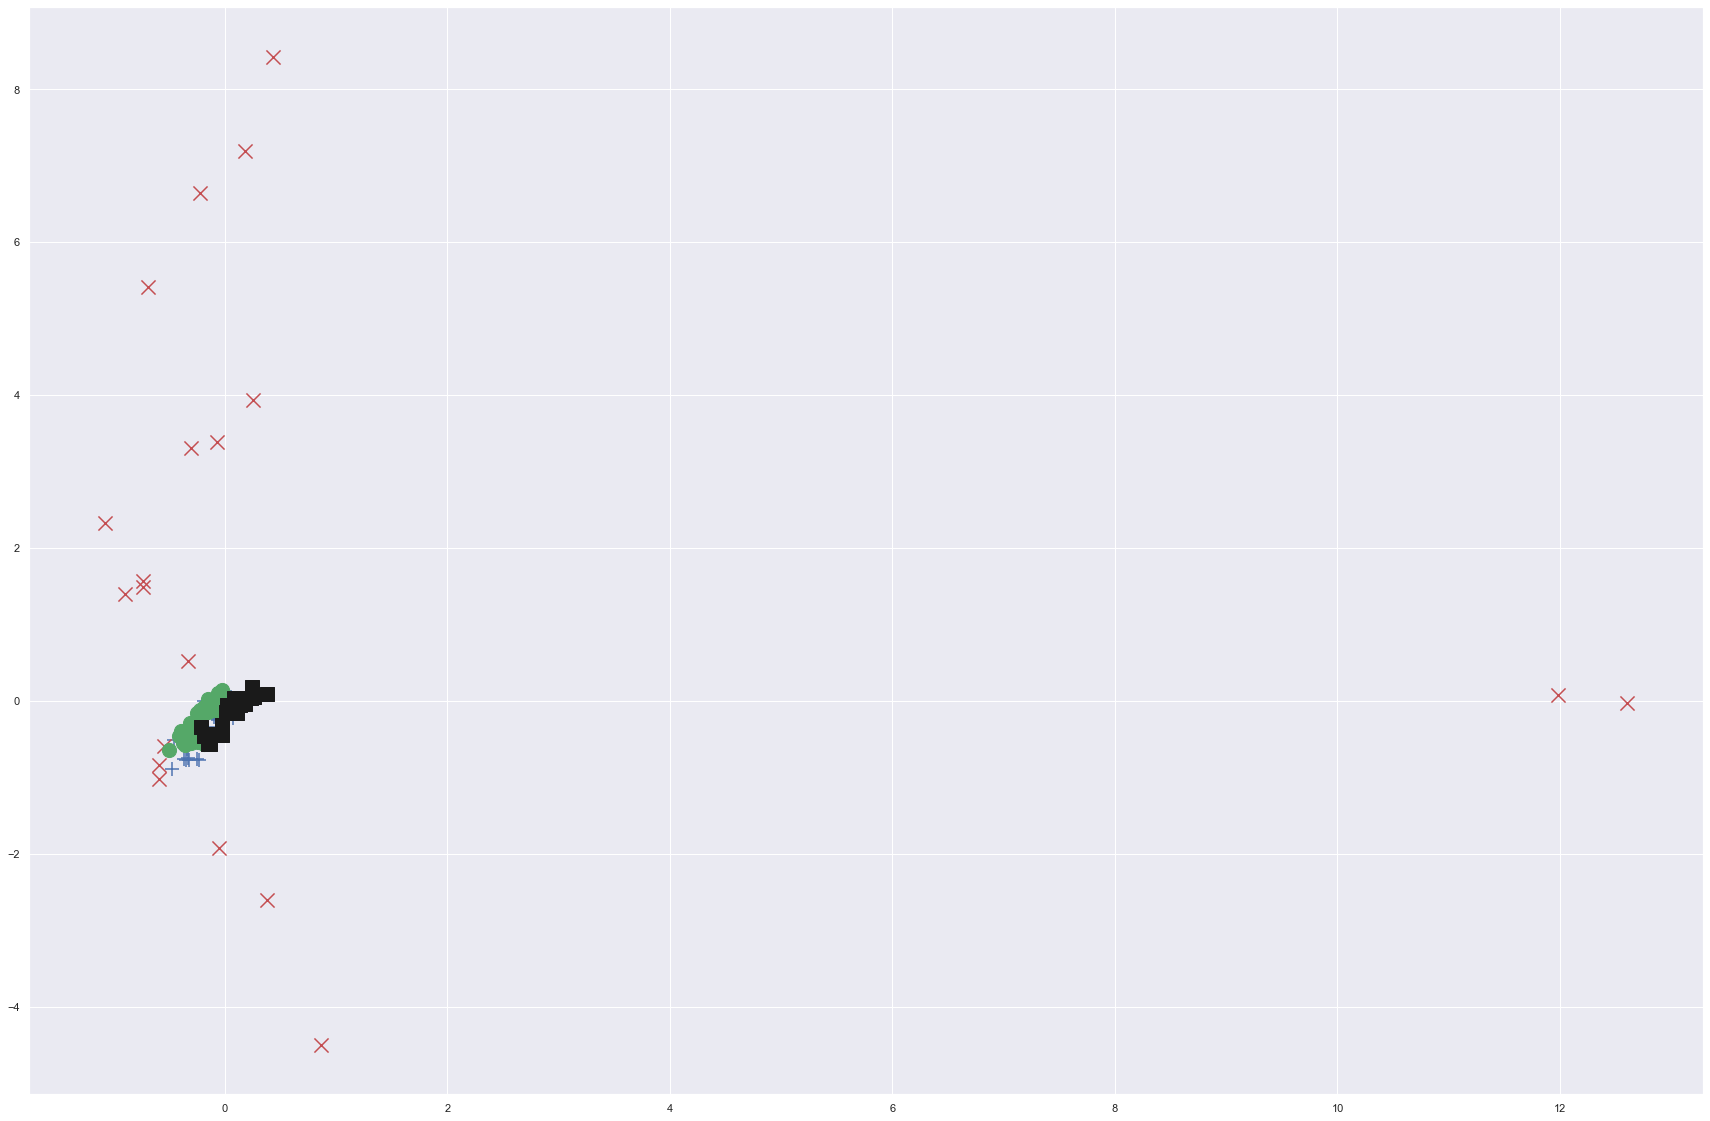

In [32]:
import matplotlib.pyplot as plt

colors = {1:'b', 2:'r', 3:'g', 4:'k'}
markerTypes = {1:'+', 2:'x', 3:'o', 4:'s'}

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

for foodType in markerTypes:
    print(foodType)
    d = finalDf_C[finalDf_C['Class Attruibute']==foodType]
    plt.scatter(d['PC1'],d['PC2'],c=colors[foodType],s=200,marker=markerTypes[foodType])